# <font color="purple"><h3 align="center">SBERBANK GOAL 1</h3></font>

## **Exploratory Data Analysis**

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection, preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
color = sns.color_palette()
%matplotlib inline
# result transform
def num2log(arr):
    return np.log(arr + 1)
# result retransform
def log2num(arr):
    return np.exp(arr) - 1
# treat date
def trans_date(arr): 
    return datetime.datetime.strptime(arr, '%Y-%m-%d').date()

In [178]:
train_df = pd.read_csv("modelingData.csv")
#Print the number of rows and columns in the dataset
print('In trainset, there are {} rows and {} columns'.format(train_df.shape[0],train_df.shape[1]))#0 is row, 1 is columns
pd.set_option('display.max_columns', None) #Displays All the columns
train_df.head()

In trainset, there are 30471 rows and 292 columns


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [179]:
train_df.shape # of rows and columns 

(30471, 292)

In [180]:
train_df.info() #information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [181]:
train_df.timestamp.max()

'2015-06-30'

In [182]:
#train_df['2015-07-01':'2016-05-01']
#train_df[(train_df['timestamp'] >= '2013-07-01') & (train_df['timestamp'] <= '2014-05-01')]

# <font color='blue'>Complete description of neighbourhood features</font>

In [183]:
#list(train_df)

In [184]:
train_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

## <font color='blue'>Median of year based upon sub_area</font>

In [185]:
v = train_df.set_index(['sub_area'])['build_year'].replace(0, np.nan) 
m = v.median(level=[0])
train_df.update(v.fillna(m).reset_index())
train_df['build_year'] = train_df['build_year'].apply(np.floor) #Remove decimals after median
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [186]:
train_df = train_df.fillna(train_df.median())

In [187]:
train_df.head() # df.head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [188]:
'''plt.figure(figsize=(12,8))
sns.distplot(num2log(train_df.price_doc.values), bins=100, kde=False)
sns.distplot((train_df.price_doc.values), bins=100, kde=False)
plt.xlabel('price', fontsize=14)
plt.title('Distribution of log price_doc', fontsize = 18)
plt.show()'''

"plt.figure(figsize=(12,8))\nsns.distplot(num2log(train_df.price_doc.values), bins=100, kde=False)\nsns.distplot((train_df.price_doc.values), bins=100, kde=False)\nplt.xlabel('price', fontsize=14)\nplt.title('Distribution of log price_doc', fontsize = 18)\nplt.show()"

## <font color='blue'>Columns</font>

In [189]:
train_df['date'] = train_df['timestamp'].apply(trans_date)
train_df['year'] = train_df.date.apply(lambda x: x.year)
train_df['day'] = train_df.date.apply(lambda x: x.day)
train_df['month_num'] = train_df.date.apply(lambda x: (x.month-7) + 12*(x.year-2011))
train_df['month'] = train_df.date.apply(lambda x: x.month)
start_date = train_df.date.min()
train_df['diff_date'] = train_df['date'].apply(lambda x: (x - start_date).days)
train_df['log_price'] = num2log(train_df.price_doc.values)

In [190]:
month_num_count = train_df.groupby('month_num').count().reset_index()
month_num_count = train_df.groupby('month_num').size().reset_index()
month_num_count.columns = ['month_num', 'Count']

In [191]:
goal2_df = train_df.groupby('month_num', as_index=False)['price_doc'].mean()

In [192]:
goal_df = train_df.groupby('month_num', as_index=False).mean()

In [193]:
goal_df.head()

,month_num,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000

### Need to Convert to Int to remove decimal from year and month

In [72]:
goal_df['year'] = goal_df['year'].astype(int)
goal_df['month'] = goal_df['month'].astype(int)

In [173]:
###Concatenate Year and month
goal_df['monthYear'] = (goal_df['year'].astype(str)).str.cat(goal_df['month'].astype(str),sep=" ")
goal_df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

In [74]:
goal3_df = goal_df[['month_num','monthYear','log_price','price_doc']]
goal3_df.set_index('month_num', inplace=True)
goal3_df.head()

,monthYear,log_price,price_doc
month_num,,,
1,2011 8,15.581733,5.850000e+06
2,2011 9,15.468526,6.007330e+06
3,2011 10,15.327725,5.808422e+06
4,2011 11,15.414676,6.115835e+06
5,2011 12,15.334195,5.824306e+06


In [75]:
#writing to excel
writer = pd.ExcelWriter('Goal2.xlsx', engine='xlsxwriter')
goal3_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [207]:
#goal3_df.reset_index()

In [15]:
train_df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [99]:
price_outlier = [8,10,16,26,40,51,57,60,67,69,81,82,83,84,87,93,97,100,108,121,122,124,133,142,144,145,153,155,165,166,171,181,185,187,193,195,196,210,211,217,220,224,228,229,234,236,238,250,272,276,294,295,298,301,303,313,318,319,323,329,330,332,333,349,353,360,362,365,366,371,374,375,385,386,406,415,422,430,434,442,447,449,450,453,455,468,470,475,487,495,499,504,506,507,517,519,524,528,539,542,556,559,565,574,576,577,580,581,582,587,589,592,602,613,614,619,620,626,634,635,638,639,640,643,646,648,649,660,662,663,664,670,673,677,678,681,688,704,711,713,719,720,727,744,748,755,760,767,771,784,786,787,802,813,814,816,819,826,842,855,857,859,861,866,871,878,880,891,896,899,902,907,936,938,941,944,963,966,990,998,999,1011,1014,1030,1035,1039,1040,1046,1052,1053,1058,1059,1060,1067,1073,1078,1080,1081,1098,1100,1104,1110,1114,1118,1125,1130,1131,1150,1158,1168,1170,1173,1175,1177,1180,1184,1191,1201,1207,1216,1218,1237,1241,1243,1246,1250,1256,1261,1262,1264,1265,1269,1282,1283,1292,1295,1300,1301,1304,1305,1312,1318,1334,1336,1343,1345,1346,1359,1363,1374,1379,1381,1384,1386,1408,1413,1414,1416,1424,1425,1429,1433,1434,1435,1469,1491,1495,1498,1511,1518,1521,1524,1527,1529,1532,1536,1551,1571,1576,1582,1584,1585,1591,1595,1596,1597,1599,1607,1613,1625,1629,1631,1635,1636,1640,1641,1647,1657,1672,1682,1683,1687,1691,1696,1720,1727,1729,1735,1755,1756,1762,1768,1773,1777,1779,1780,1781,1790,1804,1814,1816,1831,1838,1844,1847,1853,1860,1863,1864,1865,1872,1874,1883,1884,1901,1908,1909,1912,1918,1923,1927,1946,1947,1953,1958,1962,1963,1964,1967,1968,1974,1981,1987,1988,1989,2002,2013,2018,2033,2048,2052,2054,2057,2058,2066,2070,2076,2077,2094,2100,2102,2111,2112,2120,2121,2133,2134,2141,2145,2164,2168,2186,2188,2191,2192,2213,2217,2229,2239,2242,2259,2260,2268,2271,2277,2283,2284,2294,2307,2311,2313,2317,2329,2336,2341,2347,2352,2356,2358,2364,2367,2373,2377,2387,2390,2403,2407,2424,2425,2431,2435,2439,2441,2449,2455,2458,2461,2465,2498,2509,2513,2516,2525,2530,2543,2562,2565,2569,2571,2583,2587,2605,2610,2619,2631,2633,2634,2637,2639,2646,2656,2674,2680,2692,2699,2725,2741,2745,2747,2751,2757,2760,2763,2766,2781,2785,2791,2795,2796,2803,2805,2833,2845,2846,2856,2871,2881,2885,2888,2908,2913,2914,2915,2926,2950,2965,2975,2978,2994,2997,3001,3002,3013,3019,3020,3029,3036,3042,3051,3054,3058,3064,3068,3070,3075,3076,3085,3112,3122,3125,3134,3135,3137,3139,3141,3144,3152,3156,3161,3169,3180,3187,3195,3198,3199,3200,3201,3219,3227,3236,3244,3249,3261,3262,3265,3274,3297,3303,3316,3318,3324,3326,3348,3354,3358,3361,3363,3391,3405,3418,3425,3426,3429,3432,3435,3446,3452,3472,3475,3494,3503,3513,3522,3533,3557,3560,3574,3582,3607,3621,3625,3666,3676,3688,3691,3716,3747,3763,3773,3782,3787,3825,3858,3874,3910,3918,3941,3942,3944,3945,3948,3950,3952,3959,3961,3981,3984,4019,4054,4058,4062,4118,4149,4200,4211,4247,4263,4264,4289,4290,4323,4351,4353,4372,4419,4434,4447,4474,4522,4533,4546,4566,4572,4580,4663,4674,4681,4686,4703,4718,4787,4795,4806,4843,4846,4850,4902,4966,5014,5017,5018,5060,5062,5064,5085,5151,5162,5203,5211,5225,5231,5239,5278,5298,5300,5320,5329,5351,5380,5397,5417,5437,5462,5466,5468,5482,5493,5507,5526,5546,5549,5590,5615,5622,5629,5665,5672,5675,5681,5688,5692,5730,5731,5738,5751,5765,5778,5783,5785,5797,5805,5806,5812,5843,5847,5851,5854,5867,5870,5872,5889,5912,5914,5961,5969,5971,5987,6002,6043,6049,6065,6083,6084,6085,6101,6102,6111,6113,6114,6156,6159,6174,6194,6197,6205,6239,6245,6249,6267,6277,6284,6307,6322,6361,6371,6376,6379,6385,6386,6405,6417,6487,6531,6545,6577,6595,6596,6634,6675,6683,6716,6722,6727,6735,6739,6751,6756,6772,6780,6808,6813,6836,6842,6851,6863,6870,6912,6917,6919,6925,6933,6939,6942,6949,6985,6991,6995,6997,7001,7002,7016,7022,7031,7034,7060,7083,7098,7120,7129,7138,7147,7148,7151,7156,7157,7190,7191,7197,7234,7242,7274,7277,7285,7302,7314,7374,7378,7392,7395,7410,7425,7441,7442,7446,7448,7460,7462,7464,7465,7474,7477,7479,7484,7490,7512,7533,7588,7596,7630,7688,7701,7702,7761,7768,7811,7859,7864,7875,7877,7890,7929,7933,7959,7993,8010,8033,8037,8038,8052,8088,8139,8196,8259,8296,8352,8359,8363,8393,8406,8424,8430,8459,8482,8484,8486,8492,8493,8520,8528,8557,8577,8605,8608,8618,8624,8645,8658,8691,8726,8743,8795,8811,8812,8819,8823,8826,8829,8840,8847,8872,8889,8898,8904,8917,8924,8926,8936,8956,8957,8977,8989,8991,8994,9003,9014,9050,9056,9065,9082,9087,9090,9095,9102,9108,9117,9131,9134,9136,9153,9161,9164,9170,9183,9186,9205,9215,9224,9236,9248,9270,9286,9288,9306,9367,9422,9447,9456,9465,9466,9497,9520,9524,9559,9560,9567,9581,9595,9612,9639,9659,9675,9676,9706,9709,9725,9729,9749,9754,9758,9759,9762,9780,9791,9833,9844,9845,9848,9852,9873,9881,9882,9897,9911,9914,9926,9934,9935,9949,9981,10000,10035,10056,10060,10073,10098,10118,10133,10174,10181,10183,10191,10201,10203,10212,10219,10230,10244,10265,10266,10271,10275,10294,10298,10338,10395,10418,10422,10432,10436,10443,10466,10487,10488,10491,10502,10523,10542,10578,10582,10601,10604,10632,10633,10642,10652,10653,10688,10694,10697,10699,10711,10715,10752,10755,10763,10769,10799,10805,10827,10848,10861,10874,10881,10895,10932,10946,10959,10969,10989,10991,11018,11024,11026,11032,11039,11047,11070,11087,11088,11091,11094,11105,11119,11120,11135,11149,11171,11174,11175,11185,11203,11255,11258,11277,11288,11300,11307,11310,11341,11364,11374,11388,11392,11395,11419,11420,11431,11444,11445,11456,11459,11488,11492,11503,11518,11524,11535,11539,11541,11559,11569,11586,11595,11597,11599,11637,11695,11699,11700,11714,11744,11752,11757,11772,11795,11815,11817,11821,11826,11829,11839,11851,11869,11884,11898,11901,11906,11926,11946,11947,11977,11987,11995,11997,12009,12029,12073,12075,12078,12084,12092,12109,12113,12114,12124,12136,12140,12142,12147,12154,12176,12211,12226,12233,12249,12261,12274,12275,12279,12285,12347,12349,12359,12364,12370,12391,12392,12394,12395,12396,12397,12414,12416,12420,12422,12432,12441,12463,12465,12468,12472,12473,12477,12486,12492,12498,12510,12524,12530,12535,12545,12571,12573,12575,12578,12586,12597,12600,12610,12618,12620,12627,12631,12638,12658,12664,12685,12705,12728,12741,12755,12763,12779,12816,12830,12842,12855,12862,12865,12870,12872,12875,12884,12923,12924,12941,12945,12961,12963,12977,12997,13001,13005,13011,13013,13032,13058,13060,13062,13075,13094,13096,13102,13104,13112,13125,13132,13144,13147,13165,13186,13208,13244,13245,13250,13257,13263,13265,13294,13308,13310,13321,13346,13371,13386,13401,13408,13412,13433,13437,13445,13464,13470,13473,13487,13493,13506,13510,13532,13541,13585,13596,13608,13616,13691,13694,13715,13719,13775,13808,13814,13837,13839,13841,13844,13846,13849,13856,13864,13869,13873,13890,13892,13901,13905,13927,13928,13932,13934,13940,13959,13966,13979,13994,14009,14035,14036,14042,14055,14085,14099,14129,14137,14143,14148,14176,14217,14223,14233,14262,14292,14295,14309,14315,14335,14346,14375,14377,14387,14392,14407,14412,14413,14414,14441,14443,14462,14472,14478,14483,14520,14533,14535,14537,14543,14570,14573,14576,14598,14607,14610,14643,14644,14645,14649,14653,14668,14673,14680,14718,14759,14760,14768,14771,14787,14803,14806,14811,14831,14840,14841,14864,14871,14873,14892,14909,14920,14963,14981,15008,15011,15025,15051,15052,15062,15065,15067,15071,15084,15133,15136,15148,15160,15165,15176,15203,15204,15207,15245,15252,15265,15279,15293,15302,15308,15309,15349,15352,15357,15386,15390,15400,15413,15420,15430,15454,15463,15475,15487,15488,15490,15494,15510,15515,15525,15535,15538,15567,15610,15613,15667,15673,15686,15704,15709,15711,15726,15732,15748,15759,15832,15840,15845,15872,15888,15894,15896,15898,15903,15922,15930,15937,15957,15963,15977,15981,15983,16003,16005,16041,16057,16068,16069,16085,16094,16102,16105,16117,16129,16133,16137,16150,16152,16157,16162,16166,16173,16181,16190,16207,16216,16224,16225,16233,16260,16262,16271,16275,16281,16282,16300,16314,16320,16323,16329,16390,16421,16423,16436,16447,16455,16457,16476,16478,16479,16486,16499,16505,16507,16514,16520,16523,16524,16533,16552,16563,16573,16575,16584,16591,16596,16597,16600,16614,16630,16632,16648,16650,16690,16699,16715,16716,16726,16728,16732,16740,16746,16759,16764,16768,16789,16802,16819,16822,16823,16846,16874,16890,16892,16904,16936,16962,16965,16969,16972,16973,16981,16982,16991,17007,17018,17051,17064,17068,17073,17098,17110,17125,17149,17174,17176,17182,17199,17217,17224,17244,17268,17274,17280,17289,17297,17299,17319,17339,17360,17363,17371,17380,17392,17397,17401,17405,17433,17461,17481,17492,17497,17500,17508,17509,17510,17515,17520,17529,17531,17532,17534,17544,17564,17614,17615,17620,17626,17649,17686,17687,17696,17699,17703,17717,17736,17747,17765,17790,17791,17829,17844,17867,17892,17896,17921,17927,17936,17944,17954,17958,17960,17962,17976,17991,17992,17993,18047,18059,18073,18079,18093,18095,18096,18109,18110,18121,18137,18154,18182,18194,18215,18216,18224,18227,18231,18232,18249,18269,18282,18284,18337,18340,18356,18369,18389,18391,18392,18404,18417,18424,18429,18433,18436,18452,18469,18488,18511,18523,18525,18532,18546,18566,18576,18580,18583,18606,18612,18615,18675,18682,18683,18715,18717,18719,18726,18743,18772,18773,18792,18795,18801,18808,18815,18836,18842,18843,18850,18871,18873,18877,18878,18882,18892,18898,18936,18951,18954,18963,18971,18972,18976,18993,18997,19001,19002,19021,19022,19032,19036,19082,19098,19112,19113,19117,19124,19132,19145,19187,19188,19197,19208,19217,19219,19249,19252,19255,19270,19273,19276,19305,19306,19309,19325,19326,19331,19338,19341,19345,19351,19370,19374,19399,19401,19434,19437,19438,19457,19463,19500,19509,19510,19516,19526,19537,19544,19558,19598,19630,19638,19641,19643,19647,19666,19667,19672,19673,19711,19715,19717,19734,19736,19747,19749,19759,19781,19794,19815,19829,19874,19886,19897,19898,19910,19918,19924,19935,19937,19951,19977,19981,20003,20005,20023,20029,20030,20045,20059,20061,20086,20087,20094,20109,20137,20158,20201,20206,20243,20247,20275,20281,20291,20293,20294,20341,20379,20391,20405,20411,20424,20446,20461,20470,20472,20502,20557,20568,20592,20616,20620,20624,20656,20668,20724,20730,20759,20761,20789,20842,20844,20850,20871,20874,20896,20897,20903,20906,20911,20918,20921,20925,20939,20970,20971,20976,20983,21003,21007,21013,21022,21030,21045,21052,21059,21060,21061,21069,21073,21082,21111,21115,21117,21126,21128,21151,21152,21158,21174,21185,21191,21192,21203,21207,21211,21212,21217,21218,21222,21235,21236,21246,21256,21265,21278,21280,21286,21294,21307,21317,21324,21325,21337,21349,21356,21359,21364,21384,21388,21389,21422,21430,21438,21453,21464,21471,21478,21501,21505,21511,21514,21515,21529,21538,21553,21574,21578,21592,21607,21608,21610,21620,21627,21637,21678,21700,21703,21739,21742,21748,21749,21781,21788,21790,21807,21809,21814,21822,21835,21857,21879,21895,21898,21900,21918,21938,21940,21948,21950,21960,21970,21975,21999,22008,22019,22020,22026,22031,22033,22043,22045,22076,22091,22103,22115,22121,22124,22130,22136,22165,22166,22208,22264,22275,22299,22305,22306,22314,22315,22338,22352,22372,22374,22381,22384,22387,22411,22437,22449,22496,22499,22514,22528,22538,22549,22550,22583,22587,22613,22617,22621,22630,22641,22659,22661,22667,22668,22669,22681,22697,22718,22742,22754,22760,22771,22780,22781,22782,22785,22804,22808,22811,22819,22836,22853,22856,22861,22867,22881,22886,22888,22891,22908,22915,22926,22937,22940,22952,22970,22978,22998,23010,23015,23019,23027,23031,23047,23051,23062,23077,23084,23100,23101,23105,23116,23127,23167,23168,23236,23245,23253,23256,23264,23288,23294,23311,23333,23341,23363,23374,23381,23383,23395,23397,23405,23408,23422,23433,23436,23442,23444,23451,23459,23505,23512,23513,23539,23553,23562,23605,23611,23617,23626,23633,23639,23653,23664,23674,23689,23702,23708,23748,23756,23769,23782,23788,23794,23820,23841,23852,23856,23887,23891,23894,23899,23908,23916,23926,23936,23944,23961,23967,23984,23997,24023,24025,24032,24045,24046,24054,24057,24059,24074,24081,24089,24092,24100,24126,24133,24144,24149,24152,24154,24156,24161,24188,24193,24209,24213,24245,24254,24267,24270,24273,24338,24341,24367,24375,24383,24384,24386,24423,24447,24454,24470,24502,24504,24505,24527,24558,24560,24583,24584,24587,24613,24620,24633,24643,24656,24688,24710,24745,24747,24771,24781,24783,24787,24799,24800,24806,24814,24815,24817,24834,24846,24857,24859,24868,24870,24885,24915,24916,24952,24958,24960,24980,24987,25022,25027,25051,25074,25075,25086,25100,25102,25104,25108,25130,25146,25152,25156,25169,25175,25186,25201,25203,25207,25248,25250,25260,25263,25279,25286,25299,25307,25329,25344,25368,25375,25405,25408,25422,25426,25484,25493,25499,25520,25543,25580,25586,25591,25595,25597,25618,25626,25642,25651,25657,25660,25665,25688,25697,25698,25739,25742,25748,25750,25770,25784,25789,25806,25811,25812,25821,25825,25826,25855,25870,25883,25885,25887,25889,25907,25921,25968,25982,25998,26024,26046,26071,26074,26088,26102,26109,26111,26121,26126,26134,26141,26151,26153,26162,26172,26180,26190,26193,26196,26201,26216,26227,26244,26249,26281,26286,26292,26294,26320,26323,26354,26363,26392,26462,26466,26479,26490,26504,26515,26538,26549,26554,26568,26571,26576,26591,26613,26641,26650,26658,26660,26661,26664,26668,26705,26710,26715,26719,26746,26766,26782,26785,26786,26806,26810,26821,26853,26859,26868,26882,26888,26892,26907,26920,26921,26929,26948,26953,26959,27004,27034,27041,27042,27043,27049,27059,27067,27072,27090,27101,27103,27110,27114,27120,27131,27134,27137,27146,27149,27214,27239,27254,27265,27276,27286,27301,27309,27312,27313,27320,27327,27350,27363,27390,27394,27401,27427,27445,27461,27463,27469,27477,27494,27499,27524,27526,27534,27538,27540,27556,27584,27587,27595,27609,27618,27624,27660,27664,27677,27678,27685,27698,27704,27713,27752,27754,27767,27768,27774,27811,27820,27824,27829,27833,27847,27881,27888,27894,27908,27914,27916,27918,27937,27950,27974,27988,28027,28034,28036,28038,28046,28090,28098,28128,28134,28135,28173,28183,28185,28192,28194,28196,28201,28227,28236,28270,28271,28278,28293,28313,28329,28376,28378,28385,28388,28394,28422,28450,28468,28475,28484,28502,28509,28525,28532,28546,28550,28561,28572,28609,28621,28625,28643,28656,28684,28701,28727,28730,28737,28746,28747,28754,28766,28782,28786,28805,28807,28814,28819,28824,28850,28856,28871,28901,28924,28929,28959,28961,28972,28992,28997,28999,29009,29012,29044,29049,29051,29064,29066,29069,29081,29118,29123,29125,29188,29211,29225,29226,29243,29300,29309,29328,29359,29372,29378,29419,29470,29493,29497,29499,29515,29520,29533,29537,29561,29603,29606,29608,29614,29619,29633,29649,29659,29694,29718,29760,29775,29790,29807,29810,29829,29831,29833,29839,29850,29861,29874,29885,29913,29927,29938,29941,29952,29956,29978,30000,30011,30015,30028,30037,30041,30048,30055,30080,30082,30118,30123,30143,30153,30157,30171,30194,30213,30223,30228,30229,30233,30236,30243,30271,30276,30286,30315,30318,30323,30334,30338,30358,30369,30372,30373,30377,30393,30400,30404,30406,30413,30420,30441,30444,30459,30470
]
kitchen_outlier = [10092,13120,28737,11523,21418,10371]
total_outlier = [3530,129,1310,1481,2428,2553,2783,3530,3599,4241,4454,4635,5139,5336,5505,5947,6149,7210,8830,16844,17141
,17277,17361,17713,18344,18528,18672,22177,22788,23718,27292,27796,28084,28564,28619,28958,29073,29313,219,703,775,1086
,1189,1825,2012,2078,2750,2859,2890,2909,2919,3061,3911,3938,4185,4347,4441,4672,5346,5349,5651,5669,5694,5752,5820,5960
,6115,6360,6472,7571,8059,8298,9377,9608,10325,10813,11020,11335,13425,13496,14997,15239,16292,16741,17197,17254,17935
,18603,19096,19224,19462,19908,19957,20165,20934,22174,22415,22725,22798,22874,23231,23576,23729,23938,24299,24317
,24630,24895,24981,25572,25654,25890,26081,26267,26366,26389,26585,26928,26978,27157,29137,30342]

#filtering outliers
train_df = train_df[~train_df.id.isin(price_outlier)]
train_df = train_df[~train_df.id.isin(kitchen_outlier)]
train_df = train_df[~train_df.id.isin(total_outlier)]

#writing to excel
writer = pd.ExcelWriter('data_wrangled.xlsx', engine='xlsxwriter')
train_df.to_excel(writer, sheet_name='Sheet1')
writer.save()


In [203]:
#Need to reset index for plots to work
goal3_df.reset_index(inplace=True)

In [204]:
#goal3_df.head()

,month_num,monthYear,log_price,price_doc
0,1,2011 8,15.581733,5.850000e+06
1,2,2011 9,15.468526,6.007330e+06
2,3,2011 10,15.327725,5.808422e+06
3,4,2011 11,15.414676,6.115835e+06
4,5,2011 12,15.334195,5.824306e+06


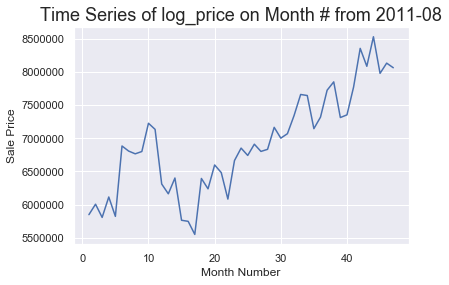

In [333]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="month_num", y="price_doc", data=goal3_df)
plt.ylabel('Sale Price', fontsize=12)
plt.xlabel('Month Number', fontsize=12)
plt.title('Time Series of log_price on Month # from 2011-08', fontsize = 18)
plt.show()

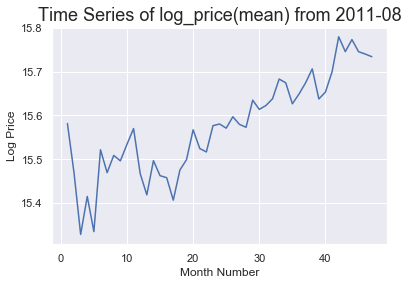

In [341]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="month_num", y="log_price", data=goal3_df)
plt.ylabel('Log Price', fontsize=12)
plt.xlabel('Month Number', fontsize=12)
plt.title('Time Series of log_price(mean) from 2011-08', fontsize = 18)
plt.show()

In [103]:
#goal_df['year'] = goal_df['year'].astype(int)
#goal_df['month_num'] = goal_df['month_num'].astype(int)
#goal_df['month_num'] = goal_df['month_num'].astype(int)

In [325]:
#goal3_df.head()

In [324]:
#goal3_df.loc[:,'month_num']

In [318]:
from sklearn import linear_model
# Create linear regression object
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(goal3_df[['month_num']],goal3_df[['log_price']])
# check that the coeffients are the expected ones.
m = reg.coef_[0]
b = reg.intercept_
print(' y = {0} * x + {1}'.format(m, b))

 y = [0.00730676] * x + [15.39982952]


In [319]:
#Define Linear Space and Predict the y values using the model
xfit = np.linspace(0, 50, 5000) #5000 Generates the number of samples to make predictions
yfit = reg.predict(xfit[:, np.newaxis])

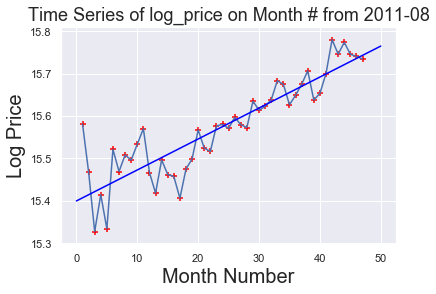

In [334]:
#Plot the Data
%matplotlib inline
#month_num = goal3_df.loc[:,'month_num']
ax = sns.lineplot(x="month_num", y="log_price", data=goal3_df) #This line connects the datapoints with a line.
plt.xlabel('Month Number', fontsize=20)
plt.ylabel('Log Price', fontsize=20)
plt.scatter(goal3_df.month_num,goal3_df.log_price,color='red',marker='+')
plt.plot(xfit, yfit,color='blue');
plt.title('Time Series of log_price on Month # from 2011-08', fontsize = 18)
plt.show()

In [360]:
print(reg.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

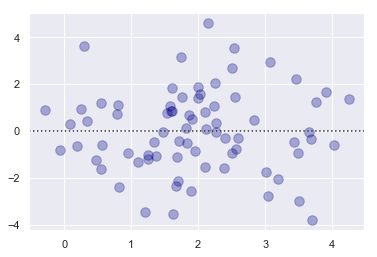

In [358]:
#sns.residplot(xfit,yfit,scatter_kws={"color":"darkred","alpha":0.3,"s":90})
sns.residplot(x,y,scatter_kws={"color":"darkblue","alpha":0.3,"s":90})

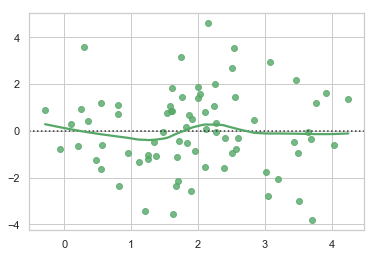

In [337]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

# Make an example dataset with y ~ x
#rs = np.random.RandomState(7)
#x = rs.normal(2, 1, 75)
#y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(, y, lowess=True, color="g")

In [322]:
import statsmodels.api as sm
Y = goal3_df[['log_price']]
X = goal3_df[['month_num']]
result = sm.OLS( Y, X ).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     148.4
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           5.37e-16
Time:                        15:37:42   Log-Likelihood:                -161.87
No. Observations:                  47   AIC:                             325.7
Df Residuals:                      46   BIC:                             327.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month_num      0.4936      0.041     12.180      0.000       0.412       0.575
==============================================================================
Omnibus:                       10.517   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                2.799
Skew:                           0.007   Prob(JB):                        0.247
Kurtosis:                       1.805   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
'''import statsmodels.formula.api as smf
lm = smf.ols( Y, X ).fit()
print (lm.summary())

influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print ('\n')
print ('Leverage v.s. Studentized Residuals')
sns.regplot(leverage, lm.resid_pearson,  fit_reg=False)*/'''

"import statsmodels.formula.api as smf\nlm = smf.ols( Y, X ).fit()\nprint (lm.summary())\n\ninfluence = lm.get_influence()\nresid_student = influence.resid_studentized_external\n(cooks, p) = influence.cooks_distance\n(dffits, p) = influence.dffits\nleverage = influence.hat_matrix_diag\n\nprint ('\n')\nprint ('Leverage v.s. Studentized Residuals')\nsns.regplot(leverage, lm.resid_pearson,  fit_reg=False)*/"

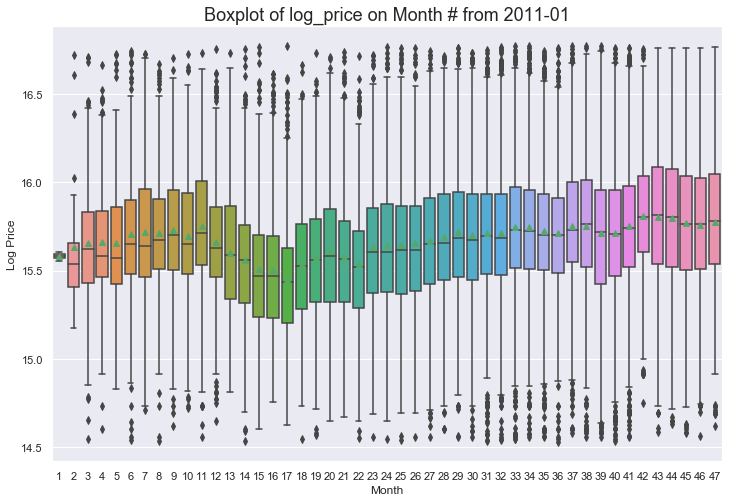

In [101]:
plt.figure(figsize=(12,8))
#sns.boxplot(x = 'month_num', y = 'log_price', data = train_df)
sns.boxplot(x = 'month_num', y = 'log_price', data = train_df,showmeans=True)
#sns.boxplot(x = 'month_num', y = 'price_doc', data = goal_df)
plt.ylabel('Log Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of log_price on Month # from 2011-01', fontsize = 18)
plt.show()
#plt.figure(figsize=(12,8))
#sns.distplot(month_num_count.Count.values, bins=50, kde=False)
#plt.xlabel('count of samples per month_num', fontsize=14)
#plt.title('Distribution of count', fontsize = 18)
#plt.show()

In [97]:
#month_num_count

In [98]:
'''plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'log_price', data = train_df)
plt.ylabel('Log Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of log_price on Month', fontsize = 18)
plt.show()'''

"plt.figure(figsize=(12,8))\nsns.boxplot(x = 'month', y = 'log_price', data = train_df)\nplt.ylabel('Log Price', fontsize=12)\nplt.xlabel('Month', fontsize=12)\nplt.title('Boxplot of log_price on Month', fontsize = 18)\nplt.show()"

In [227]:
#date_count = train_df.groupby('date').count().reset_index()
#date_count = train_df.groupby('date').size().reset_index()
#date_count.columns = ['date', 'Count']
'''plt.figure(figsize=(12,8))
sns.boxplot(x = 'date', y = 'log_price', data = train_df)
plt.ylabel('Log Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Boxplot of log_price on Date', fontsize = 18)
plt.show()
plt.figure(figsize=(12,8))
sns.distplot(date_count.Count.values, bins=100, kde=False)
plt.xlabel('count of samples per date', fontsize=14)
plt.title('Distribution of count', fontsize = 18)
plt.show()'''

"plt.figure(figsize=(12,8))\nsns.boxplot(x = 'date', y = 'log_price', data = train_df)\nplt.ylabel('Log Price', fontsize=12)\nplt.xlabel('Date', fontsize=12)\nplt.title('Boxplot of log_price on Date', fontsize = 18)\nplt.show()\nplt.figure(figsize=(12,8))\nsns.distplot(date_count.Count.values, bins=100, kde=False)\nplt.xlabel('count of samples per date', fontsize=14)\nplt.title('Distribution of count', fontsize = 18)\nplt.show()"

In [228]:
missing = train_df.isnull().sum(0).reset_index()
missing.columns = ['column', 'count']
missing = missing.sort_values(by = 'count', ascending = False).loc[missing['count'] > 0]
missing['percentage'] = missing['count'] / float(train_df.shape[0]) * 100
missing.shape
#ind = np.arange(missing.shape[0])
#width = 0.9
#fig, ax = plt.subplots(figsize=(10,18))
#rects = ax.barh(ind, missing.percentage.values, color='r')
#ax.set_yticks(ind)
#ax.set_yticklabels(missing.column.values, rotation='horizontal')
#ax.set_xlabel("Precentage of missing values %", fontsize = 14)
#ax.set_title("Number of missing values in each column", fontsize = 18)
#plt.show()

(0, 3)

In [229]:
delete_col = missing.loc[missing['percentage'] >= 20].column.values##Using Entire Dataset,testing with another dataset
train_set = train_df.drop(delete_col, axis=1)
#train_set.shape

In [230]:
for f in train_set.columns:
    if train_set[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_set[f].values)) 
        train_set[f] = lbl.transform(list(train_set[f].values))
dtype_df = train_set.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,178
1,float64,120


In [231]:
#sns.pairplot(train_df)

In [232]:
#sns.boxplot(x='sub_area', y='log_price',data=train_df)

# Histograms of Price before and after Log

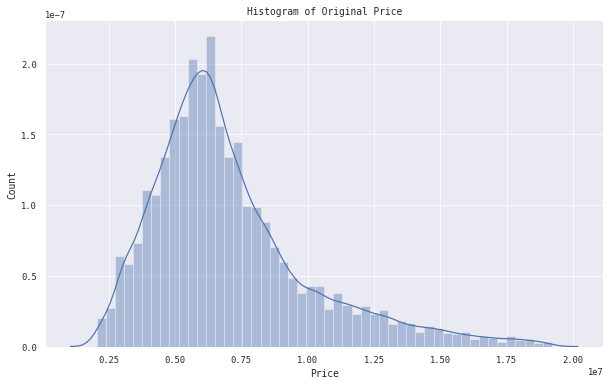

In [233]:
plt.figure(figsize=[10,6])#Increase size
sns.distplot([train_df['price_doc']])
plt.title("Histogram of Original Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

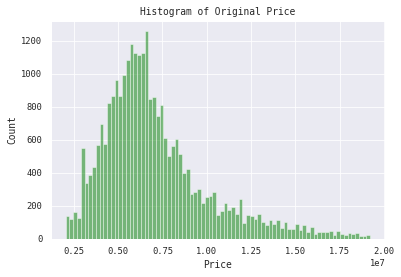

In [234]:
#from matplotlib import pyplot
#seed(1)
#pyplot.hist(train_df['price_doc']
#pyplot.show()

rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
rng.normal(loc=5, scale=2, size=1000)))
plt.hist(train_df['price_doc'], bins='auto',facecolor='green',alpha=.5)
plt.title("Histogram of Original Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

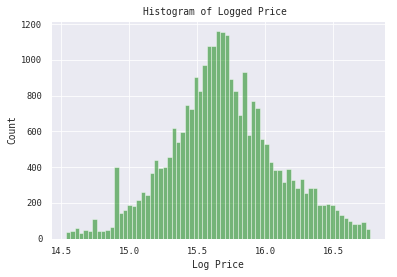

In [235]:
plt.hist(train_df['log_price'], bins='auto',facecolor='green',alpha=.5)
plt.title("Histogram of Logged Price ")
plt.xlabel("Log Price")
plt.ylabel("Count")
plt.show()

In [236]:
'''#########
for column in train_df.columns:
    if train_df[column].dtype == type(object):
        le = LabelEncoder()
        train_df[column] = le.fit_transform(train_df[column])
#########'''  

'#########\nfor column in train_df.columns:\n    if train_df[column].dtype == type(object):\n        le = LabelEncoder()\n        train_df[column] = le.fit_transform(train_df[column])\n#########'

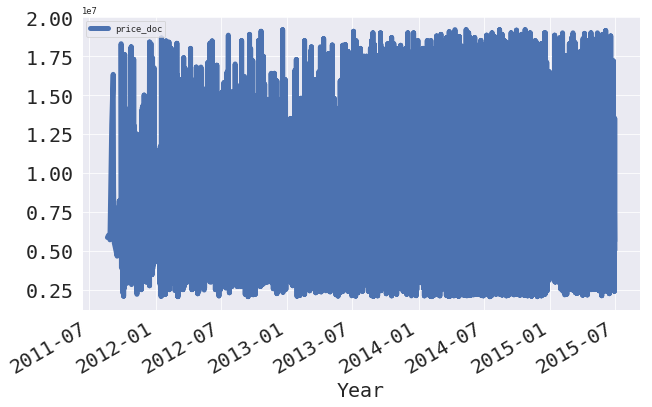

In [237]:
%matplotlib inline
train_df.timestamp = pd.to_datetime(train_df.timestamp)
train_df.set_index('timestamp', inplace=True)
#train_df['price_doc'].plot()
#train_df.reset_index()

train_df[['price_doc']].plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

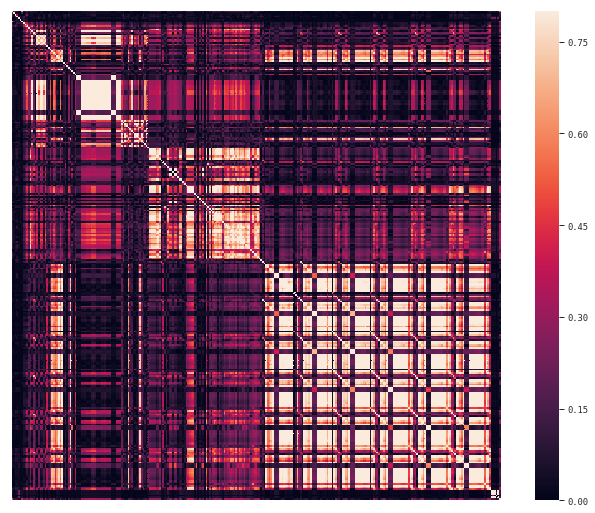

In [238]:
corrmat = train_set.drop(["id", "timestamp", "price_doc"], axis=1).corr(method='pearson', min_periods=1000)
# plot absolute values
corrmat = np.abs(corrmat)
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels = False, yticklabels = False)

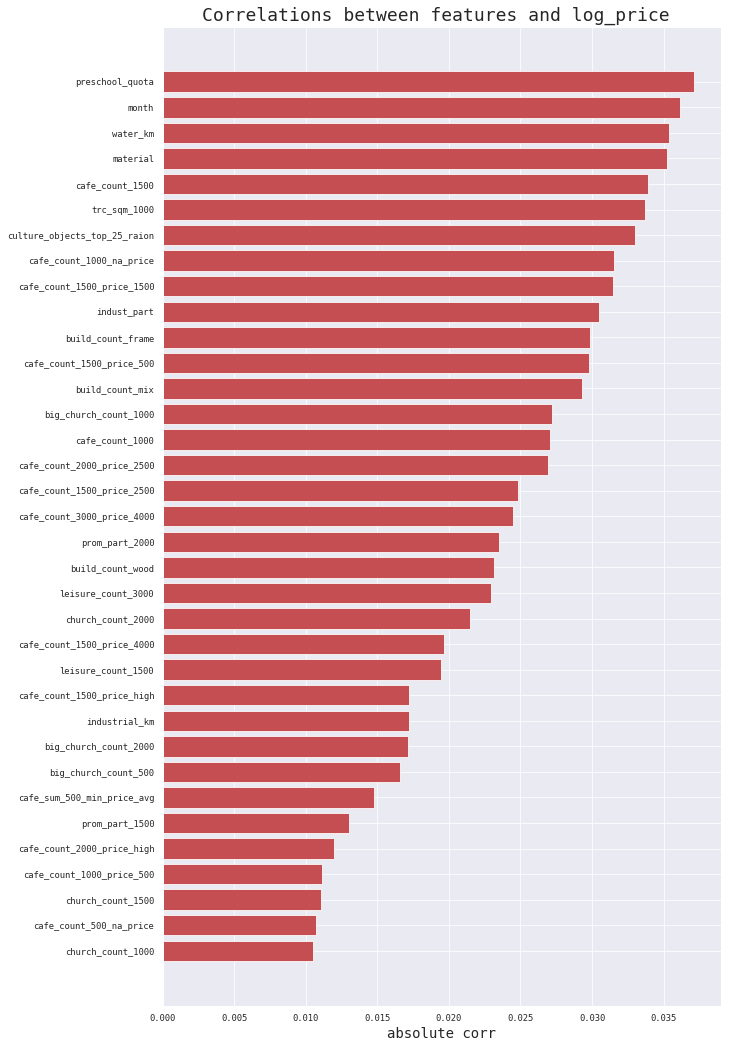

In [239]:
remain_num = 50
corr_target = corrmat['log_price'].reset_index()[:-2]
corr_target.columns = ['feature','abs_corr']
corr_target = corr_target.sort_values(by = 'abs_corr', ascending = True)[:remain_num].loc[corr_target['abs_corr'] >0.01]
ind = np.arange(corr_target.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, corr_target.abs_corr.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_target.feature.values, rotation='horizontal')
ax.set_xlabel("absolute corr", fontsize = 14)
ax.set_title("Correlations between features and log_price ", fontsize = 18)
plt.show()

In [240]:
corr_target_f = list(corr_target.feature.values)
#corr_target_f

Text(0.5, 1.0, 'High-corrlation Features')

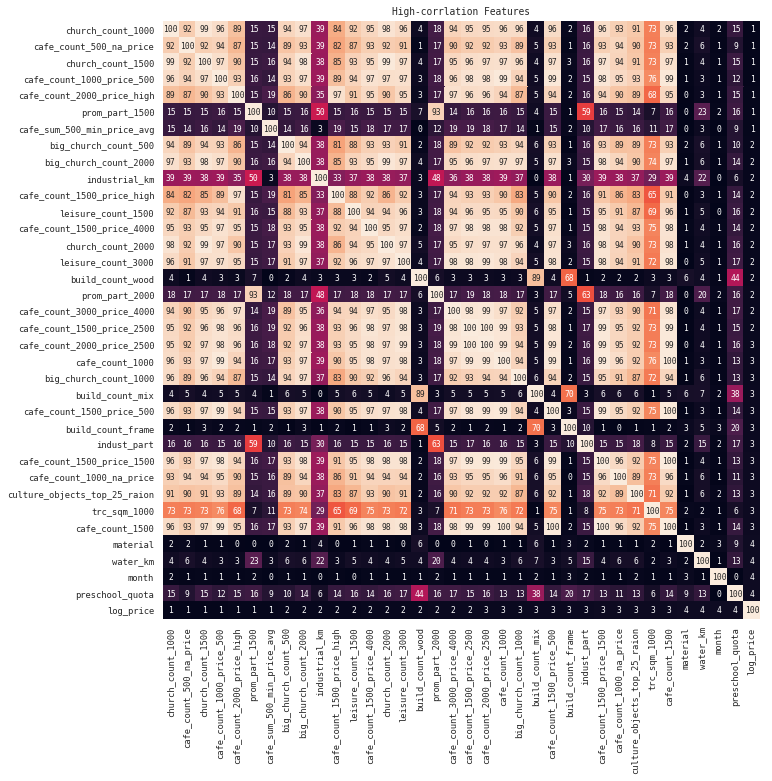

In [241]:
corr_target_f2 = corr_target_f
corr_target_f2.append('log_price')
high_corr = train_set[corr_target_f2].corr(method='pearson', min_periods=1000)
high_corr = np.abs(high_corr)*100
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(high_corr, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
#plt.show()

In [242]:
#high_corr = high_corr.drop(["log_price"], axis=1)
#high_corr.info()
#corr_target.tail
#type(corr_target)
train_X1 = train_set[corr_target.feature]
#print(list(corr_target.feature))
#train_X1.describe

In [243]:
#remove_list = ['cafe_sum_5000_max_price_avg','16_29_male', 'female_f','full_all', 'male_f','log_price']
corr_target_f = [x for x in corr_target_f if x not in remove_list]

In [244]:
train_y = train_set.log_price.values
train_X = train_set.drop(["id", "timestamp", "price_doc", "log_price"], axis=1)
#train_X = train_X1

In [245]:
type(train_y)

numpy.ndarray

In [246]:
reg = LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [247]:
train_X = train_X.fillna(train_df.median())
train_df = train_df.fillna(train_df.median())
train_X.tail()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_pr

In [248]:
#corr_target

In [101]:
#Beginning for Extracting Correlations
# First extract the target variable
Y = train_y
# Drop price from the house dataframe and create a matrix out of the house data
#train_df = train_df.drop(['price_doc'], axis=1)
X = train_X.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = list(train_X.columns)
#colnames

In [102]:
from sklearn.preprocessing import MinMaxScaler
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))



In [103]:
# Finally let's run our Selection Stability method with Randomized Lasso
train_y=train_y.astype('int')
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(train_X,train_y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

NameError: name 'RandomizedLasso' is not defined

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(train_X,train_y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=None, verbose =0 )
rfe.fit(train_X,train_y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=1)
#print(ranks["RFE"]) 
#print(list(ranks["RFE"]))

In [ ]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(train_X,train_y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(train_X,train_y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(train_X,train_y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(train_X,train_y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50

building tree 7 of 50building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.2s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.5s finished


In [44]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	Mean
full_sq	1.0	0.0	1.0	0.0	0.06	0.41
life_sq	0.0	0.0	0.04	0.86	0.0	0.18
floor	0.36	0.0	0.06	0.18	0.03	0.13
max_floor	0.15	0.0	0.04	0.34	0.02	0.11
material	0.0	0.0	0.01	0.03	0.06	0.02
build_year	0.0	0.0	0.05	0.88	0.0	0.19
num_room	0.0	0.0	0.01	0.0	0.2	0.04
kitch_sq	0.0	0.0	0.03	0.46	0.01	0.1
state	0.0	0.0	0.02	0.0	0.23	0.05
product_type	0.0	0.0	0.01	0.0	0.37	0.08
sub_area	0.02	0.0	0.0	0.9	0.0	0.18
area_m	0.0	0.0	0.0	1.0	0.0	0.2
raion_popul	0.0	0.0	0.0	0.0	0.02	0.0
green_zone_part	0.0	0.0	0.0	0.33	0.42	0.15
indust_part	0.0	0.0	0.0	0.62	0.28	0.18
children_preschool	0.0	0.0	0.0	0.0	0.17	0.03
preschool_quota	0.0	0.0	0.0	0.88	0.0	0.18
preschool_education_centers_raion	0.0	0.0	0.0	0.02	0.13	0.03
children_school	0.0	0.0	0.0	0.0	0.11	0.02
school_quota	0.0	0.0	0.0	0.89	0.0	0.18
school_education_centers_raion	0.0	0.0	0.0	0.0	0.18	0.04
school_education_centers_top_20_raion	0.0	0.0	0.0	0.0	0.16	0.03
hospital_beds_raion	0.0	0.0	0.0	0.9	0.0	0.18
healthcare_centers_raion	0

In [45]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

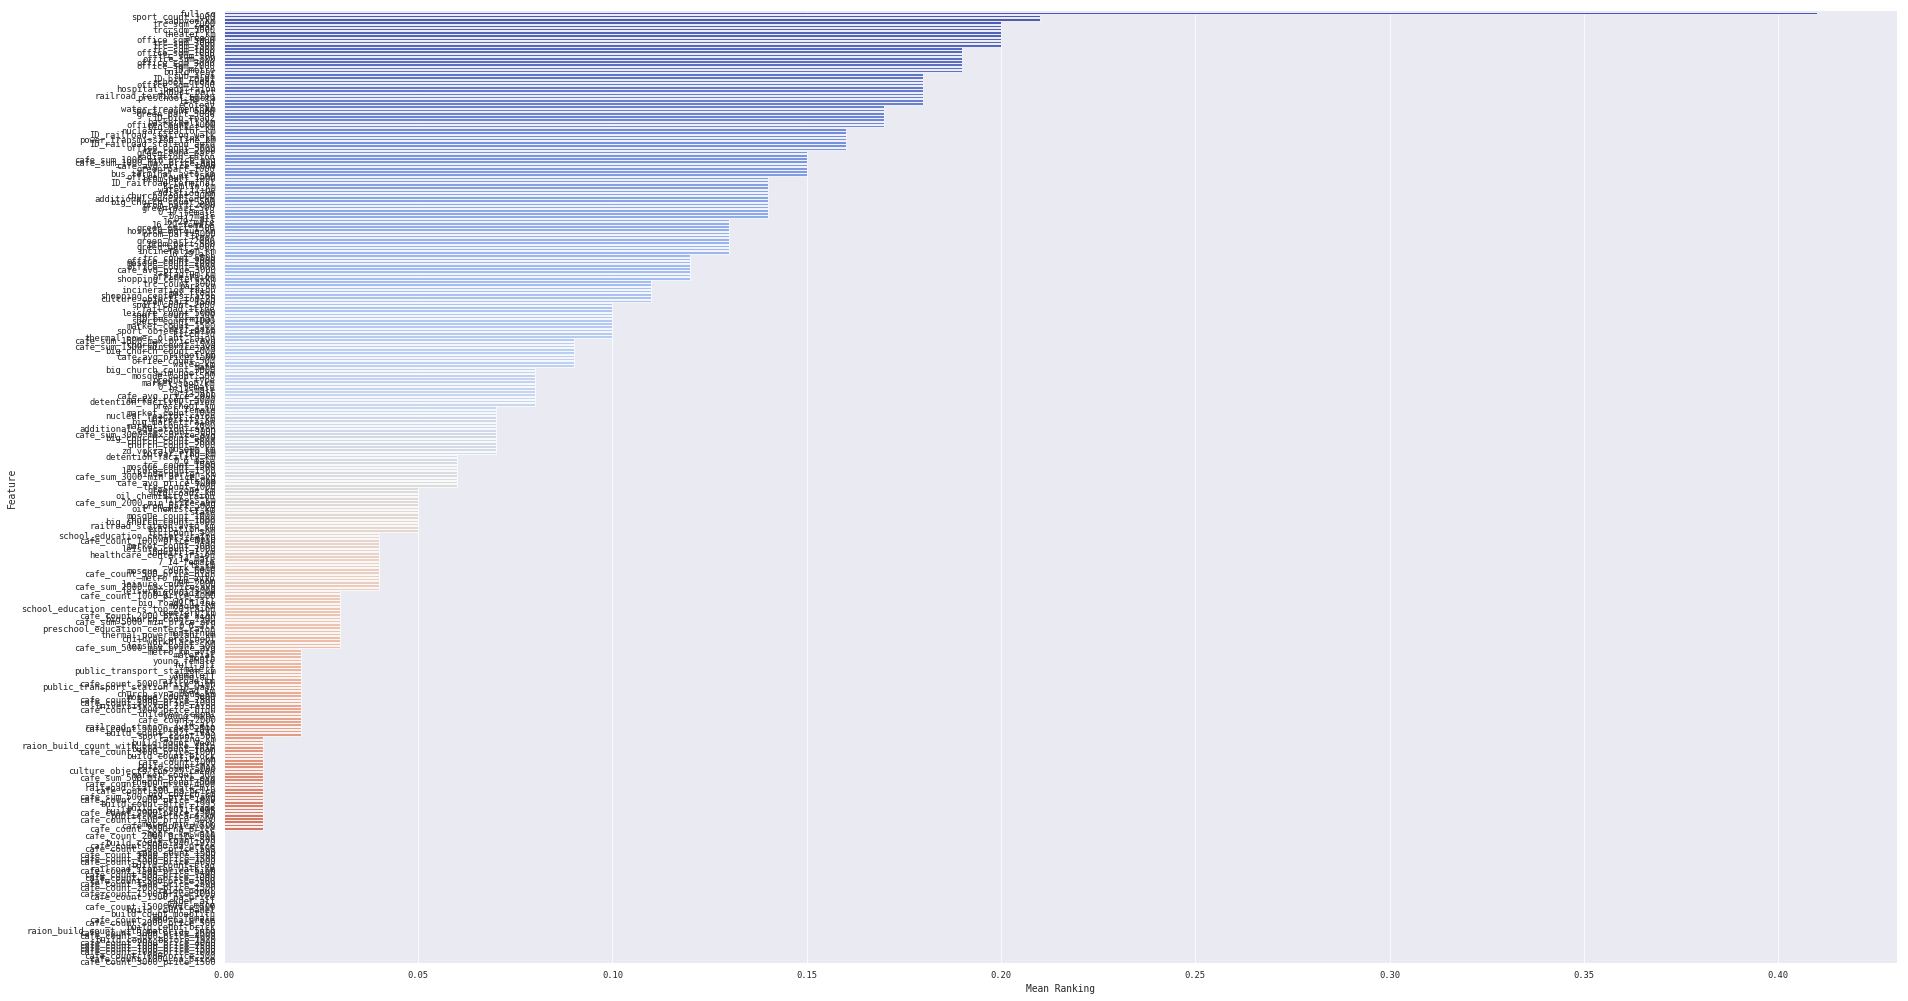

In [46]:
# Let's plot the ranking of the features
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.show()

In [47]:
#End

In [48]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(train_X,train_y)
X_train_selected = select.transform(train_X)
print(train_X.shape)
print(X_train_selected.shape)


(27661, 294)
(27661, 147)


[ True  True  True False False False  True  True  True  True  True  True
  True  True False  True False  True  True False  True False  True  True
 False  True False False False  True False False  True False  True False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True  True False False False False  True  True
 False False False False False False False False False False  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True False  True  True False  True  True False False  True  True  True
  True  True  True  True False  True False  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True  True False
 False False False False False False False  True Fa

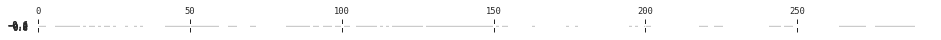

In [49]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [50]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
%matplotlib inline
#X_train_selected = select.transform(xTest)
#logreg = LogisticRegression()
#logreg.fit(xTrain,yTrain)

#Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest

#Split the data into input and target
yTrain=yTrain.astype('int')
#We will select the features using chi square
test = SelectKBest(score_func=chi2, k=4)
#Fit the function for ranking the features by score
fit = test.fit(xTrain, yTrain)
#Summarize scores numpy.set_printoptions(precision=3) print(fit.scores_)
#Apply the transformation on to dataset
features = fit.transform(xTrain)
#Summarize selected features print(features[0:5,:])
#print("Num Features: %d"% fit.n_features_) print("Selected Features: %s"% fit.support_) print("Feature Ranking: %s"% fit.ranking_)

NameError: name 'chi2' is not defined

In [51]:
#type(ranks["RFE"])
#l_list  = list(ranks["RFE"].keys())+list(ranks["RFE"].values())
#print(l_list)

#print ([(k,v) for k,v in ranks["RFE"].items()])
dfObj = pd.DataFrame(ranks["RFE"], index=['a'])
print(dfObj)

   full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
a      0.0     0.86   0.18       0.34      0.03        0.88       0.0   

   kitch_sq  state  product_type  sub_area  area_m  raion_popul  \
a      0.46    0.0           0.0       0.9     1.0          0.0   

   green_zone_part  indust_part  children_preschool  preschool_quota  \
a             0.33         0.62                 0.0             0.88   

   preschool_education_centers_raion  children_school  school_quota  \
a                               0.02              0.0          0.89   

   school_education_centers_raion  school_education_centers_top_20_raion  \
a                             0.0                                    0.0   

   hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
a                  0.9                      0.14                      0.0   

   sport_objects_raion  additional_education_raion  culture_objects_top_25  \
a                  0.5                      

# Model Selection##################

In [263]:
from sklearn.model_selection import train_test_split
X, xTest, y, yTest = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)
y=y.astype('int')

In [264]:
feature_name = X.columns.tolist()

In [265]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-50:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [266]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

50 selected features


In [267]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=50)
chi_selector.fit(X_norm, y)

SelectKBest(k=50, score_func=<function chi2 at 0x1a1d2987b8>)

In [268]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

50 selected features


In [269]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=50, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 294 features.
Fitting estimator with 284 features.
Fitting estimator with 274 features.
Fitting estimator with 264 features.
Fitting estimator with 254 features.
Fitting estimator with 244 features.
Fitting estimator with 234 features.
Fitting estimator with 224 features.
Fitting estimator with 214 features.
Fitting estimator with 204 features.
Fitting estimator with 194 features.
Fitting estimator with 184 features.
Fitting estimator with 174 features.
Fitting estimator with 164 features.
Fitting estimator with 154 features.
Fitting estimator with 144 features.
Fitting estimator with 134 features.
Fitting estimator with 124 features.
Fitting estimator with 114 features.
Fitting estimator with 104 features.
Fitting estimator with 94 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=50, step=10, verbose=5)

In [270]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

50 selected features


In [271]:
##### from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold='1.25*median')

In [272]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

133 selected features


In [273]:
##### from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=50), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold='1.25*median')

In [274]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

128 selected features


In [275]:
#Had to comment out because it kills the kernal.
'''
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X, y)'''

"\nfrom sklearn.feature_selection import SelectFromModel\nfrom lightgbm import LGBMClassifier\n\nlgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,\n            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)\n\nembeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')\nembeded_lgb_selector.fit(X, y)"

In [277]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})#, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 50
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(50)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,workplaces_km,True,True,True,True,True,5
2,trc_count_5000,True,True,True,True,True,5
3,office_km,True,True,True,True,True,5
4,metro_min_walk,True,True,True,True,True,5
5,metro_min_avto,True,True,True,True,True,5
6,metro_km_walk,True,True,True,True,True,5
7,full_sq,True,True,True,True,True,5
8,zd_vokzaly_avto_km,True,False,True,True,True,4
9,work_male,True,True,False,True,True,4
10,trc_sqm_5000,True,True,False,True,True,4


In [186]:
#writing to excel
writer = pd.ExcelWriter('features.xlsx', engine='xlsxwriter')
feature_selection_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [278]:
first_24_features = feature_selection_df[:7]
first_24_features

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,workplaces_km,True,True,True,True,True,5
2,trc_count_5000,True,True,True,True,True,5
3,office_km,True,True,True,True,True,5
4,metro_min_walk,True,True,True,True,True,5
5,metro_min_avto,True,True,True,True,True,5
6,metro_km_walk,True,True,True,True,True,5
7,full_sq,True,True,True,True,True,5


In [279]:
Features = first_24_features[['Feature']].head(7)

In [280]:
list_of_features = Features['Feature'].tolist()

In [281]:
list_of_features

['workplaces_km',
 'trc_count_5000',
 'office_km',
 'metro_min_walk',
 'metro_min_avto',
 'metro_km_walk',
 'full_sq']

In [282]:
df = train_df[['workplaces_km',
 'trc_count_5000',
 'office_km',
 'metro_min_walk',
 'metro_min_avto',
 'metro_km_walk',
 'full_sq']].head(5)

In [283]:
#first_24_features_df=train_df[['zd_vokzaly_avto_km', 'workplaces_km', 'trc_count_5000', 'thermal_power_plant_km', 'stadium_km', 'railroad_station_avto_min', 'radiation_km', 'public_transport_station_min_walk', 'public_transport_station_km', 'public_healthcare_km', 'power_transmission_line_km', 'park_km', 'office_sqm_5000', 'office_km', 'nuclear_reactor_km', 'metro_min_walk', 'metro_min_avto', 'metro_km_walk', 'metro_km_avto', 'kindergarten_km', 'full_sq', 'fitness_km', 'exhibition_km', 'catering_km','log_price']]
first_24_features_df=train_df[['workplaces_km',
 'trc_count_5000',
 'office_km',
 'metro_min_walk',
 'metro_min_avto',
 'metro_km_walk',
 'full_sq']]

In [284]:
train_df.head(5)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg

In [285]:
first_24_features_df.head(5)

,workplaces_km,trc_count_5000,office_km,metro_min_walk,metro_min_avto,metro_km_walk,full_sq
timestamp,,,,,,,
2011-08-20,0.884350,52,0.637189,13.575119,2.590241,1.131260,43
2011-08-23,0.686252,40,0.688796,7.620630,0.936700,0.635053,34
2011-08-27,1.510089,35,1.543049,17.351515,2.120999,1.445960,43
2011-09-01,0.622272,22,0.934273,11.565624,1.489049,0.963802,89
2011-09-05,0.892668,114,0.077901,8.266305,1.257186,0.688859,77


In [210]:
#writing to excel
writer = pd.ExcelWriter('first_24_features.xlsx', engine='xlsxwriter')
first_24_features_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

# End Model Selection##################

## Internal Cross-Validation 

In [286]:
from sklearn.model_selection import train_test_split
#xTrain, xTest, yTrain, yTest = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)
xTrain, xTest, yTrain, yTest = train_test_split(first_24_features_df, train_y, test_size = 0.2, random_state = 0)


In [287]:
#reg.fit(train_X,train_y)
#pred=reg.predict(train_X)
#metrics.r2_score(train_y,pred)

In [288]:
reg.fit(xTrain,yTrain)
pred=reg.predict(xTrain)
metrics.r2_score(yTrain,pred)

0.5194398077668579

In [200]:
reg.fit(xTest,yTest)
pred=reg.predict(xTest)
metrics.r2_score(yTest,pred)

0.5404628318132267

## ordinary least squares (OLS)

In [201]:
## Without a constant

import statsmodels.api as sm

X = xTrain
y = yTrain

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 7.346e+04
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:54:21   Log-Likelihood:                -52215.
No. Observations:               22128   AIC:                         1.045e+05
Df Residuals:                   22117   BIC:                         1.045e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
zd_vokzaly_avto_km                    0.3149      0.003     91.961      0.000       0.308       0.322
workplaces_km                        -0.1850      0.009    -20.498      0.000      -0.203      -0.167
trc_count_5000                        0.1503      0.001    191.205      0.000       0.149       0.152
railroad_station_avto_min             0.1157      0.004     26.654      0.000       0.107       0.124
public_transport_station_min_walk  3.604e+07   4.67e+06      7.722      0.000    2.69e+07    4.52e+07
public_transport_station_km       -4.325e+08    5.6e+07     -7.722      0.000   -5.42e+08   -3.23e+08
public_healthcare_km                 -0.1684      0.009    -19.754      0.000      -0.185      -0.152
nuclear_reactor_km                    0.1953      0.005     42.270      0.000       0.186       0.204
kindergarten_km                      -0.1184      0.017     -7.118      0.000      -0.151      -0.086
full_sq                               0.0739      0.001     84.908      0.000       0.072       0.076
catering_km                           0.2744      0.028      9.943      0.000       0.220       0.329
==============================================================================
Omnibus:                     3765.225   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6923.449
Skew:                          -1.075   Prob(JB):                         0.00
Kurtosis:                       4.700   Cond. No.                     2.18e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Lasso

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)


In [203]:
#from sklearn.linear_model import LassoLarsCV
# specify the lasso regression model
#model=LassoLarsCV(cv=10, n_jobs=3, max_iter=500, normalize=False)

In [204]:
from sklearn.linear_model import Lasso

#x_train, x_cv, y_train, y_cv = train_test_split(train_X, train_y, test_size = 0.2)
x_train, x_cv, y_train, y_cv = train_test_split(first_24_features_df, train_y, test_size = 0.2)

# create a lasso regressor
lasso = Lasso(alpha=.000001, normalize=True)

# Fit the regressor to the data
lasso.fit(x_train,y_train)
pred = lasso.predict(x_cv)

# calculating mse
mse = np.mean((pred - y_cv)**2)
print("Mean Squared Error")
print(mse)

print("R-Squared")
print(lasso.score(x_cv,y_cv))

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso.score(xTrain,yTrain))
print(lasso_coef)

Mean Squared Error
0.07385981414460475
R-Squared
0.5465021843543174
0.5473483438280563
[-0.00637736 -0.00462574  0.00022618 -0.00832387  0.00299923  0.
 -0.01117443 -0.00595743 -0.00654953  0.01321152 -0.07440974]


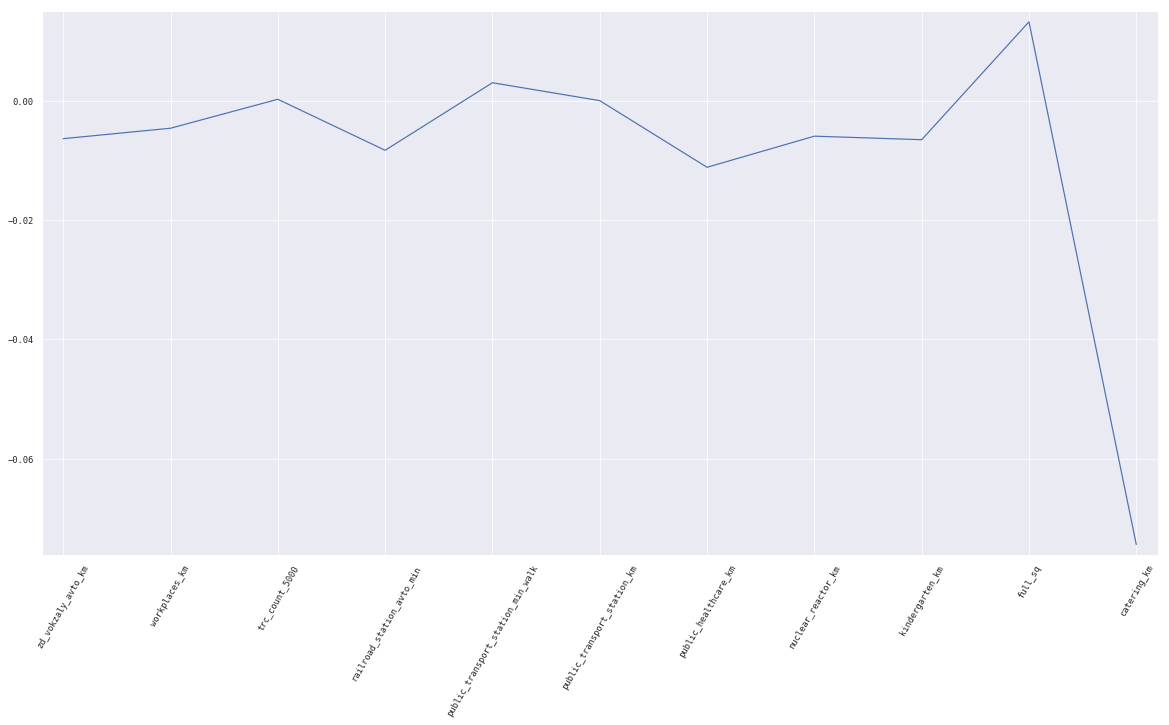

In [205]:
# Plot the coefficients
plt.figure(figsize=[20,10])#Increase size
#plt.plot(range(len(colnames)), lasso_coef)
plt.plot(range(len(list_of_features)), lasso_coef)
#plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.xticks(range(len(list_of_features)), list_of_features, rotation=60)
plt.margins(0.02)
plt.show()

In [321]:
# Import the necessary module
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, xTrain, yTrain, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.68999127 0.66077398 0.69124404 0.67711113 0.68478202]
Average 5-Fold CV Score: 0.6807804875281409


In [273]:
np.round(lm_lasso.score(xTrain,yTrain)*100,2)

19.78

In [322]:
predict_test_lasso = lm_lasso.predict(xTest)

## Elastic Net Regression

In [352]:

#####################
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=50, normalize=False)

ENreg.fit(x_train,y_train)

pred = ENreg.predict(x_cv)
print(pred)

#calculating mse

mse = np.mean((pred - y_cv)**2)
print("Mean Squared Error")
print(mse)
print("R-Squared")
ENreg.score(x_cv,y_cv)

[15.68659634 15.5775842  15.25274364 ... 15.44907059 15.80507762
 15.55011114]
Mean Squared Error
0.13174424902524443
R-Squared


0.21003624405985877

## Ridge Regression

In [360]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print(mse) 

## calculating score 

ridgeReg.score(x_cv,y_cv) 

0.05283279636948951


0.6765868467173117